# Projeto 01 - Aprendizado de Máquina

## 1.1 Install and load libraries

In [3]:
!pip install ydata-profiling --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=23884f262beb1270afbe94605db3caf85706a35fdc095f2b102e489ae4901f07
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1.2 Exploratory Data Analysis (EDA)
Extrair, transformar e carregar os dados, além de limpeza e pré-processamento.

In [9]:
df = pd.read_csv("raw_merged_heart_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


### 1.2.1 Pandas Profiling

In [10]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Output hidden; open in https://colab.research.google.com to view.

### 1.2.2 EDA Manually - Cleaning Data

In [11]:
# Dados (linhas) duplicados
df.duplicated().sum()

np.int64(1287)

In [12]:
# Deletando dados (linhas) duplicadas
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exang,0
oldpeak,0


In [14]:
n_linhas, n_colunas = df.shape
print(f"O dataset possui {n_linhas} linhas e {n_colunas} colunas.")
df.to_csv("clean_data.csv", index=False)
df_novo = pd.read_csv("clean_data.csv")

O dataset possui 894 linhas e 14 colunas.


In [15]:
# Analisando os dados pelo genero: 0 - Mulher, 1 - Homem
pd.crosstab(df.target, df.sex, margins=True, normalize=True)

sex,0,1,All
target,,,
0,0.183445,0.372483,0.555928
1,0.118568,0.325503,0.444072
All,0.302013,0.697987,1.000000


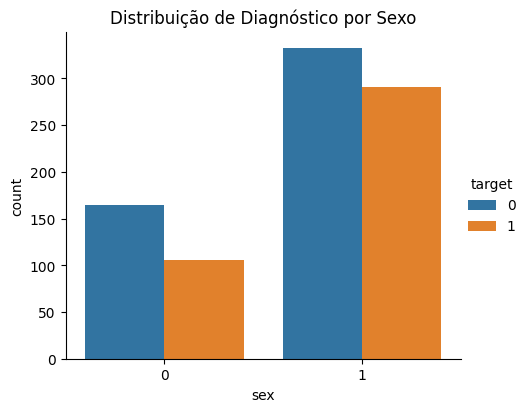

In [16]:
# Analisando os dados pelo genero (precisa?)
sns.catplot(x="sex",
            hue="target",
            data=df,
            kind="count",
            height=4,
            aspect=1.2)
plt.title("Distribuição de Diagnóstico por Sexo")
plt.show()

## 1.3 Data Checks

### Pytest

In [17]:
!pip install pytest pytest-sugar

In [18]:
%%file test_data.py
import pytest
import pandas as pd

@pytest.fixture(scope="session")
def data():
  local_path = "clean_data.csv"
  df = pd.read_csv(local_path)
  return df

def test_data_length(data):
  assert len(data) == 894

def test_number_of_columns(data):
  assert data.shape[1] == 14

def test_column_presence_and_type(data):
  required_columns = {
      "age":pd.api.types.is_int64_dtype,
      "sex":pd.api.types.is_int64_dtype,
      "cp":pd.api.types.is_int64_dtype,
      "trestbps":pd.api.types.is_object_dtype,
      "chol":pd.api.types.is_object_dtype,
      "fbs":pd.api.types.is_object_dtype,
      "restecg":pd.api.types.is_object_dtype,
      "thalachh":pd.api.types.is_object_dtype,
      "exang":pd.api.types.is_object_dtype,
      "oldpeak":pd.api.types.is_float_dtype,
      "slope":pd.api.types.is_object_dtype,
      "ca":pd.api.types.is_object_dtype,
      "thal":pd.api.types.is_object_dtype,
      "target":pd.api.types.is_int64_dtype
  }

  assert set(data.columns.values).issuperset(set(required_columns.keys()))
  for col_name, format_verification_funct in required_columns.items():
    assert format_verification_funct(data[col_name]), f"Column {col_name} failed test {format_verification_funct.__name__}"




Writing test_data.py


In [19]:
!pytest . -vv

Test session starts (platform: linux, Python 3.11.12, pytest 8.3.5, pytest-sugar 1.0.0)
cachedir: .pytest_cache
rootdir: /content
plugins: sugar-1.0.0, langsmith-0.3.42, anyio-4.9.0, typeguard-4.4.2
collected 3 items                                                              

 test_data.py::test_data_length ✓                                 33% ███▍      
 test_data.py::test_number_of_columns ✓                           67% ██████▋   
 test_data.py::test_column_presence_and_type ✓                   100% ██████████

Results (0.68s):
       3 passed


## 1.4 Data Segregation

In [20]:
import tempfile
import os
from sklearn.model_selection import train_test_split

In [21]:
# Quantidade de dados para treinamento
test_size = 0.30

# Aleatoriedade para o treinamento
seed = 41

stratify = "target"

artifact_input_name = "clean_data.csv"

In [22]:
print("Carregando e lendo artefato")
df_train = pd.read_csv(artifact_input_name)

print("Dividindo dados em treinamento e teste")
x_train, x_val, y_train, y_val = train_test_split(df_train.drop(labels=stratify, axis=1),
                                                  df_train[stratify],
                                                  test_size=test_size,
                                                  random_state=seed,
                                                  shuffle=True,
                                                  stratify=df_train[stratify])



Carregando e lendo artefato
Dividindo dados em treinamento e teste


In [23]:
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_val: {}".format(y_val.shape))

x_train: (625, 13)
y_train: (625,)
x_val: (269, 13)
y_val: (269,)


### 1.4.1 Data preparation and outlier removal

In [25]:
from sklearn.neighbors import LocalOutlierFactor

print("Remoção de outliers")
x = x_train.select_dtypes("int64").copy()

lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

Remoção de outliers


In [26]:
print("x_train shape [original]: {}".format(x_train.shape))
print("x_train shape [outlier removal]: {}".format(x_train.loc[mask].shape))

x_train shape [original]: (625, 13)
x_train shape [outlier removal]: (616, 13)


In [27]:
x_train = x_train.loc[mask,:].copy()
y_train = y_train.loc[mask].copy()

### 1.4.2 Complete Preprocessing Pipeline

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Separando variáveis numéricas e categóricas
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

if 'target' in numerical_features:
    numerical_features.remove('target')
if 'target' in categorical_features:
    categorical_features.remove('target')

# Pipeline para atributos numéricos
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para atributos categóricos
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

full_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

X = df_train.drop(columns='target')
y = df_train['target']

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicando o pipeline aos dados
x_train = full_pipeline.fit_transform(x_train)
x_val = full_pipeline.transform(x_val)

## Model: Logistic Regression

In [75]:
import torch
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Instanciando o modelo
input_dim = x_train.shape[1]
model = LogisticRegressionModel(input_dim)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


In [77]:
# Convertendo os dados para tensores PyTorch

X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

In [78]:
# Configurando Loss e otimizador

import torch.optim as optim

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Model training

In [106]:
# A evolução da função de perda (loss) durante o treinamento do modelo

epochs = 100
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Época [10/100], Loss: 0.2983
Época [20/100], Loss: 0.2982
Época [30/100], Loss: 0.2980
Época [40/100], Loss: 0.2979
Época [50/100], Loss: 0.2978
Época [60/100], Loss: 0.2977
Época [70/100], Loss: 0.2975
Época [80/100], Loss: 0.2974
Época [90/100], Loss: 0.2973
Época [100/100], Loss: 0.2972


### Avaliation Model

In [107]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_val_tensor)
    y_pred = (y_pred_probs >= 0.5).float()


In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Acurácia:", accuracy_score(y_val_tensor, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_val_tensor, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_val_tensor, y_pred))

Acurácia: 0.6431226765799256
Matriz de Confusão:
 [[109  41]
 [ 55  64]]

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.66      0.73      0.69       150
         1.0       0.61      0.54      0.57       119

    accuracy                           0.64       269
   macro avg       0.64      0.63      0.63       269
weighted avg       0.64      0.64      0.64       269



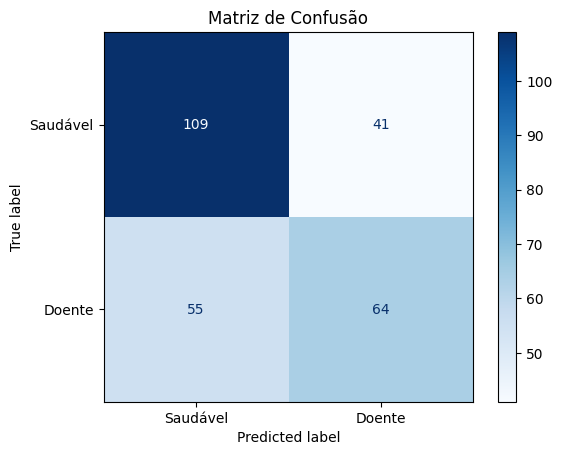

In [109]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), display_labels=['Saudável', 'Doente'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()
